<a href="https://colab.research.google.com/github/ALLADOUMBAYE/DATA-QUALITY/blob/master/Deep_Learning_with_MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


import tensorflow_datasets as tfds

In [11]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info = True, as_supervised =True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64) 

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /=255.
  return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BUFFER_SIZE = 100

train_data = train_data.batch(BUFFER_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data)) 

Model

outline the Model

In [12]:
input_size = 784
output_size = 10
hidden_layer_size = 100

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(output_size, activation='softmax')
                             ])

Choose the optimizer and the loss function 

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training

In [14]:
NUM_EPOCHS = 10

history = model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/10
540/540 - 8s - loss: 0.3173 - accuracy: 0.9097 - val_loss: 0.1504 - val_accuracy: 0.9585
Epoch 2/10
540/540 - 4s - loss: 0.1285 - accuracy: 0.9621 - val_loss: 0.1007 - val_accuracy: 0.9705
Epoch 3/10
540/540 - 4s - loss: 0.0922 - accuracy: 0.9724 - val_loss: 0.0824 - val_accuracy: 0.9747
Epoch 4/10
540/540 - 4s - loss: 0.0702 - accuracy: 0.9784 - val_loss: 0.0744 - val_accuracy: 0.9790
Epoch 5/10
540/540 - 4s - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.0542 - val_accuracy: 0.9840
Epoch 6/10
540/540 - 4s - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0499 - val_accuracy: 0.9850
Epoch 7/10
540/540 - 4s - loss: 0.0384 - accuracy: 0.9884 - val_loss: 0.0438 - val_accuracy: 0.9873
Epoch 8/10
540/540 - 4s - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0402 - val_accuracy: 0.9883
Epoch 9/10
540/540 - 4s - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 10/10
540/540 - 4s - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0307 - val_accuracy: 0.9907

Testing the Model

In [15]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.0800 - accuracy: 0.9783


In [16]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.08. Test accuracy: 97.83%


Summarize History and Loss

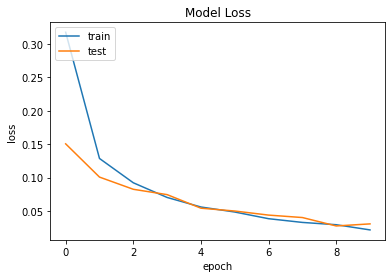

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

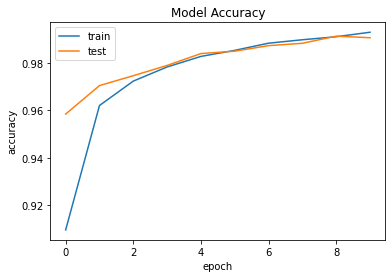

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()